<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº1
#### Milena Waichman Scigliano


# Introduccion

En este primer trabajo, el objetivo fue generar distintas señales y, mediante diversas herramientas, analizar las relaciones entre ellas. Además, se buscó calcular su energía o potencia según correspondiera en cada caso.

A lo largo del informe mostraremos cómo se generaron las señales utilizando Python, y repasaremos conceptos como ortogonalidad y correlación, explicando cómo se aplicaron a las señales creadas. También verificaremos una identidad trigonométrica y discutiremos la importancia de su aplicación en este contexto.

Finalmente, se calculará y graficará la energía de una señal proveniente de un sonido. Más allá de la resolución práctica, se presentarán los fundamentos teóricos empleados para justificar los resultados y comprender por qué ocurren ciertos fenómenos.

# 1) Sintesis y grafico de señales

En este primer punto se pidió generar seis señales distintas, graficarlas e indicar para cada una de ellas el tiempo entre muestras, el número total de muestras y la potencia o energía, según correspondiera.

Para la generación de estas señales se utilizaron distintas funciones de las librerías **NumPy** y **SciPy** de Python. Desde un principio se fijaron el número de muestras $N = 700$ y la frecuencia de muestreo $f_s = 50 , \text{kHz}$, parámetros que se aplican a todas las señales.

Además, se definió un vector de tiempo común con el objetivo de que todas las señales queden representadas en el mismo intervalo, lo cual facilitará el análisis en los puntos 2) y 3) del trabajo.

P=  0.5000000000000004
P=  0.4999999999999995
P=  0.2500000000000002
P=  0.37074028890091376
P=  1.0
E=  500.0


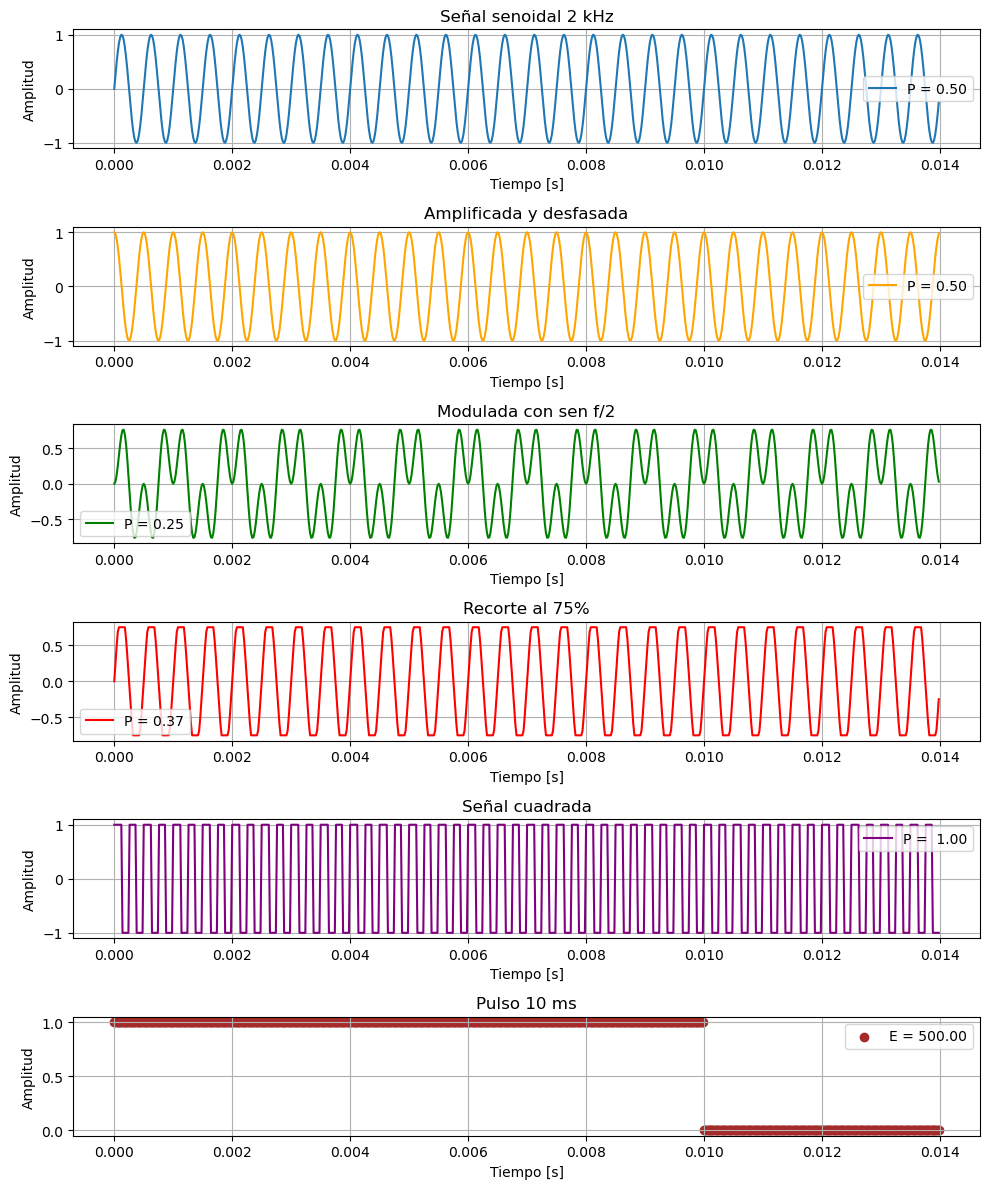

In [4]:
import matplotlib.pyplot as plt
import numpy as np
#import scipy as sc
from scipy import signal
from scipy.io import wavfile

fs = 50000 # frecuencia de muestreo, aplica para todas las señales
N = 700  # cantidad de muestras, aplica para todas las señales 
fx = 2000 #frecuencia para las senoidales
Ts = 1/fs
t = np.arange(N) * Ts # crea el array de tiempo que se usa en todas las señales

def mi_funcion_sen (A0, fx, phase, t ):
    x = A0 * np.sin(2 * np.pi * fx * t + phase)
    return x

def funcion_cuadrada (fcuad):
    x = signal.square(2 * np.pi * fcuad * t)
    return x

def pulsos(t, T):
    pulso = np.where(t < T, 1.0, 0.0)
    return pulso

#señal original
x_senoidal = mi_funcion_sen(A0 = 1, fx = fx, phase = 0, t = t)
potencia_x1 = np.mean((x_senoidal) ** 2)
print("P= ", potencia_x1)

#señal desfazada
x_desfazada = mi_funcion_sen(A0 = 1, fx = fx, phase = np.pi/2, t = t)
potencia_x2 = np.mean((x_desfazada) ** 2)
print("P= ", potencia_x2)

#señal modulada con una de la mitad de su frecuencia
x_aux = mi_funcion_sen(A0 = 1, fx = fx/2, phase = 0, t = t)
x_modulada = x_senoidal * x_aux
potencia_x3 = np.mean((x_modulada) ** 2)
print("P= ", potencia_x3)

#señal recortada al 75%
x_recortada = np.clip(x_senoidal, -0.75, 0.75, out=None)
potencia_x4 = np.mean((x_recortada) ** 2)
print("P= ", potencia_x4)

#señal cuadrada 4KHz
x_cuadrada = funcion_cuadrada(fcuad = 4000)
potencia_x5 = np.mean((x_cuadrada) ** 2)
print("P= ", potencia_x5)

#pulso de 10ms
x_pulsos = pulsos(t, 0.01)
energia_x6 = np.sum((x_pulsos) ** 2)
print("E= ", energia_x6)

#Graficos
fig, axs = plt.subplots(6, 1, figsize=(10, 12))  # 6 filas, 1 columna

# Señal senoidal
axs[0].plot(t, x_senoidal,label = f"P = {potencia_x1:.2f}")
axs[0].set_title("Señal senoidal 2 kHz")
axs[0].set_xlabel("Tiempo [s]")
axs[0].set_ylabel("Amplitud")
axs[0].legend()
axs[0].grid(True)

# Amplificada y desfasada
axs[1].plot(t, x_desfazada,label = f"P = {potencia_x2:.2f}", color="orange")
axs[1].set_title("Amplificada y desfasada")
axs[1].set_xlabel("Tiempo [s]")
axs[1].set_ylabel("Amplitud")
axs[1].legend()
axs[1].grid(True)

# Modulacion en amplitud
axs[2].plot(t, x_modulada,label = f"P = {potencia_x3:.2f}", color="green")
axs[2].set_title("Modulada con sen f/2")
axs[2].set_xlabel("Tiempo [s]")
axs[2].set_ylabel("Amplitud")
axs[2].legend()
axs[2].grid(True)

# Señal recortada
axs[3].plot(t, x_recortada,label = f"P = {potencia_x4:.2f}", color="red")
axs[3].set_title("Recorte al 75%")
axs[3].set_xlabel("Tiempo [s]")
axs[3].set_ylabel("Amplitud")
axs[3].legend()
axs[3].grid(True)

# Señal cuadrada
axs[4].plot(t, x_cuadrada,label = f"P = {potencia_x5: .2f}", color="purple")
axs[4].set_title("Señal cuadrada")
axs[4].set_xlabel("Tiempo [s]")
axs[4].set_ylabel("Amplitud")
axs[4].legend()
axs[4].grid(True)

# Pulso rectangular
axs[5].scatter(t, x_pulsos,label = f"E = {energia_x6:.2f}", color="brown", marker="o")
axs[5].set_title("Pulso 10 ms")
axs[5].set_xlabel("Tiempo [s]")
axs[5].set_ylabel("Amplitud")
axs[5].legend()
axs[5].grid(True)

# Ajustar todo
plt.tight_layout()
plt.show()



Como se puede observar en los gráficos anteriores, se generaron distintos tipos de señales. Al compartir la misma frecuencia de muestreo y el mismo número de muestras, algunas no se visualizan con total claridad, pero se eligieron los parámetros de forma que el análisis resulte lo más claro posible.

En relación con la energía y la potencia, es importante remarcar la diferencia entre ambos conceptos y por qué corresponde aplicar uno u otro según la naturaleza de la señal:

La energía mide la “cantidad total de fuerza” contenida en la señal a lo largo de toda su duración. Matemáticamente, se define como:

$$ E= \int_{-\infty}^{\infty} |x(t)|^2 dt $$

La potencia mide la “cantidad de fuerza promedio” por unidad de tiempo cuando la señal es infinita o periódica. Su expresión es:

$$ P= \lim_{T \to \infty} \frac{1}{2T}\int_{-T}^{T} |x(t)|^2 dt $$

En el ámbito discreto, que es donde estamos trabajando, la regla práctica es la siguiente:

- Si la señal es de duración finita, se calcula su energía.

- Si la señal es periódica o de duración infinita, se calcula su potencia.

Aplicando este criterio, para las primeras cinco señales se calculó su potencia, mientras que para el pulso se calculó su energía.


# 2) Ortogonalidad

En el siguiente punto se pidió verificar si la primera señal generada era ortogonal con las otras cinco. Recordemos que dos funciones son ortogonales si su producto interno es cero. En el caso discreto, el producto interno se define como:

$$ <x,y> =\sum_{n=0}^{N} x[n]\cdot y[n]=0 $$

La ortogonalidad permite determinar si dos señales se interfieren entre sí: si el producto interno es cero, significa que no comparten energía en común.

En este trabajo, la ortogonalidad se calculó usando Python. Además, para evitar que el resultado dependa de la amplitud de las señales, se normalizó el producto interno. Esto es importante porque, aunque dos funciones puedan ser ortogonales en forma, una diferencia de escala en la amplitud puede alterar el valor numérico y generar confusión.

In [13]:
def fun_ortogonalidad(x, y):
    numerador = np.sum(x*y) ##aca ya sabe que el vector tiene N elementos, entonces suma desde n=0 hasta N-1.
    denominador = np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2)) # aca normalizo cada señal
    return numerador/denominador


print("señal principal vs x1 (desfasada pi/2):", fun_ortogonalidad(x_senoidal, x_desfazada))
print("señal principal vs x2 (modulada):", fun_ortogonalidad(x_senoidal, x_modulada))
print("señal principal vs x3 (clipeada en amplitud):", fun_ortogonalidad(x_senoidal, x_recortada))
print("señal principal vs x4 (cuadrada de 4kHz):", fun_ortogonalidad(x_senoidal, x_cuadrada))
print("señal principal vs pulso:", fun_ortogonalidad(x_senoidal,x_pulsos))

señal principal vs x1 (desfasada pi/2): 5.030261921287352e-15
señal principal vs x2 (modulada): -8.900181251510305e-16
señal principal vs x3 (clipeada en amplitud): 0.9936273510079011
señal principal vs x4 (cuadrada de 4kHz): 0.053121397265726636
señal principal vs pulso: -1.4437437100898393e-16


Como se observa en los resultados anteriores, todas las señales —excepto la recortada y la cuadrada— resultaron ortogonales con la senoidal principal.

En algunos casos, como el de la señal modulada, la ortogonalidad depende de la frecuencia de muestreo y del número de muestras considerados. Si estos parámetros se modificaran, la condición de ortogonalidad podría dejar de cumplirse.

En cuanto a la señal cuadrada, solo algunos de sus armónicos son ortogonales a la senoidal, pero no la señal completa, ya que contiene múltiples componentes espectrales que se superponen con la frecuencia de la senoidal principal.

# 3) Autocorrelacion y correlacion

La correlación mide el grado de similitud entre dos señales y se define como:

$$ R_{xy}[k]= \sum_{n=0}^{N} x[n]\cdot y[n+k] $$

Esta operación permite detectar si una señal conocida aparece dentro de otra, así como identificar retardos o desfases entre señales.

Un caso particular es la autocorrelación, que consiste en comparar una señal consigo misma. Esta resulta especialmente útil para detectar periodicidades y también para estimar la energía de la señal.

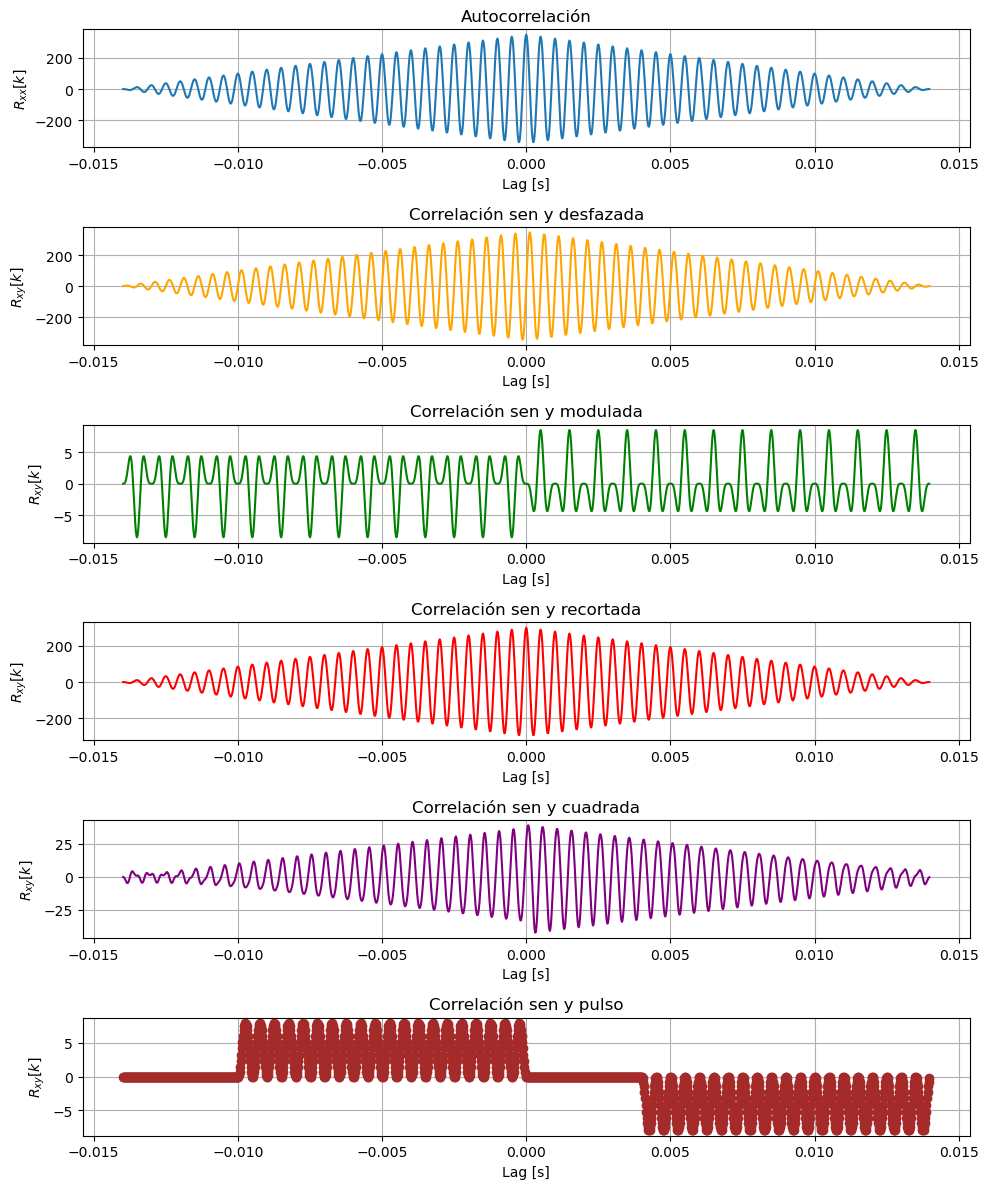

In [3]:
x0 = np.correlate(x_senoidal, x_senoidal,  mode="full")
x1 = np.correlate(x_senoidal, x_desfazada, mode="full")
x2 = np.correlate(x_senoidal, x_modulada, mode="full")
x3 = np.correlate(x_senoidal, x_recortada, mode="full")
x4 = np.correlate(x_senoidal, x_cuadrada, mode="full")
x5 = np.correlate(x_senoidal, x_pulsos, mode="full")

lags = np.arange(-N+1, N)         # retardos en muestras
lags_t = lags * Ts

fig, axs = plt.subplots(6, 1, figsize=(10, 12))  # 6 filas, 1 columna

# Autocorrelación
axs[0].plot(lags_t, x0)
axs[0].set_title("Autocorrelación")
axs[0].set_xlabel("Lag [s]")
axs[0].set_ylabel("$R_{xx}[k]$")
axs[0].grid(True)

# Correlación sen y desfazada
axs[1].plot(lags_t, x1, color="orange")
axs[1].set_title("Correlación sen y desfazada")
axs[1].set_xlabel("Lag [s]")
axs[1].set_ylabel("$R_{xy}[k]$")
axs[1].grid(True)

# Correlación sen y modulada
axs[2].plot(lags_t, x2, color="green")
axs[2].set_title("Correlación sen y modulada")
axs[2].set_xlabel("Lag [s]")
axs[2].set_ylabel("$R_{xy}[k]$")
axs[2].grid(True)

# Correlación sen y recortada
axs[3].plot(lags_t, x3, color="red")
axs[3].set_title("Correlación sen y recortada")
axs[3].set_xlabel("Lag [s]")
axs[3].set_ylabel("$R_{xy}[k]$")
axs[3].grid(True)

# Correlación sen y cuadrada
axs[4].plot(lags_t, x4, color="purple")
axs[4].set_title("Correlación sen y cuadrada")
axs[4].set_xlabel("Lag [s]")
axs[4].set_ylabel("$R_{xy}[k]$")
axs[4].grid(True)

# Correlación sen y pulso
axs[5].plot(lags_t, x5, color="brown", marker="o")
axs[5].set_title("Correlación sen y pulso")
axs[5].set_xlabel("Lag [s]")
axs[5].set_ylabel("$R_{xy}[k]$")
axs[5].grid(True)

plt.tight_layout()
plt.show()


A partir del código se calculó y graficó la correlación entre las seis señales.

- En el gráfico de autocorrelación, el pico máximo se encuentra en el retardo $k=0$, lo cual representa la energía total de la señal. La simetría del gráfico alrededor de este punto es una propiedad general de la autocorrelación de señales reales en tiempo discreto y refleja que la señal comparada consigo misma coincide de manera idéntica al desplazamiento cero. Los valores en retardos distintos de cero muestran similitudes parciales entre la señal y copias desplazadas de sí misma, lo que puede indicar periodicidades o coincidencias parciales.

- En el segundo gráfico, se refuerza el concepto de ortogonalidad: los pequeños picos en retardos distintos muestran similitud parcial al desplazar la señal, confirmando que señales desfasadas $\pi/2$ son prácticamente ortogonales.

- La comparación con la modulada muestra poca similitud, lo cual se traduce en una variedad de picos dispersos.

- En la señal recortada, se observa un comportamiento muy similar al de la autocorrelación, ya que las señales son casi idénticas: el recorte solo reduce ligeramente la altura de los picos.

- La correlación con la cuadrada presenta cambios más bruscos debido a su naturaleza no senoidal, lo que impide que se cancelen completamente los valores positivos y negativos.

- Finalmente, con el pulso, la correlación muestra coincidencia únicamente en las partes donde hay energía, como era de esperarse.



# 4) Demostracion trigonometrica

En este punto se pide demostrar la siguiente propiedad trigonometrica:
$$ 2sin(\alpha)\cdot sin(\beta)=cos(\alpha - \beta)-cos(\alpha+\beta)$$
Sabiendo las propiedades basicas de suma y resta del coseno
$$cos(A+B)=cos(A)\cdot cos(B)-sin(A)\cdot sin(B)$$
$$cos(A-B)=cos(A)\cdot cos(B)+sin(A)\cdot sin(B)$$
Reemplazando los cosenos usando las propiedades
$$2sin(\alpha)\cdot sin(\beta)=cos(\alpha)\cdot cos(\beta)+sin(\alpha)\cdot sin(\beta)-cos(\alpha)\cdot cos(\beta)+sin(\alpha)\cdot sin(\beta)$$
Los cosenos se cancelan entre si y los senos se suman
$$2sin(\alpha) \cdot sin(\beta)=2sin(\alpha)\cdot sin(\beta)$$

Ahora considerando que $\alpha=\omega t$ y $\beta=\alpha/2=\frac{\omega t}{2}$ reemplazo en la identidad trigonometrica
$$ 2sin(\omega t)\cdot sin(\frac{\omega t}{2})=cos(\omega t - \frac{\omega t}{2})-cos(\omega t+\frac{\omega t}{2})$$


In [22]:
En el código se creó una variable llamada identidad para comprobar si la igualdad se anulaba y así verificar que la propiedad se cumple para cualquier frecuencia. Para esto se utilizó la función np.allclose de NumPy, que permite establecer una tolerancia: si el cálculo arroja un valor cercano al esperado, dentro de ese margen, se lo redondea (en este caso, a cero). Como frecuencia de prueba se empleó la frecuencia de muestreo definida al inicio del informew = 2 * np.pi * fs
identidad = 2 * np.sin(w * t / 2) * np.sin(w * t / 2) - np.cos(w * t / 2) + np.cos(w * t * 3 / 2)
if np.allclose(identidad, 0, atol = 1e-12):
    print("La identidad se cumple para cualquier frecuencia w")
    print("La igualdad para cualquier f es: ", np.sum(identidad))
else:
    print("No se cumple la propiedad (el resultado es distinto de 0)")
    print(identidad)

La identidad se cumple para cualquier frecuencia w
La igualdad para cualquier f es:  0.0


En el código se creó una variable llamada identidad para comprobar si la igualdad se anulaba y así verificar que la propiedad se cumple para cualquier frecuencia. Para esto se utilizó la función **np.allclose** de NumPy, que permite establecer una tolerancia: si el cálculo arroja un valor cercano al esperado, dentro de ese margen, se lo redondea (en este caso, a cero). Como frecuencia de prueba se empleó la frecuencia de muestreo definida al inicio del informe

# Bonus

La consigna pedia descargar un wav, graficarlo y calcular su energia. Yo elegi un wav de tipo mono de duracion 15 segs. https://freesound.org/people/HenryTheGuy/sounds/822458/ 

Energía del sonido: 622402509


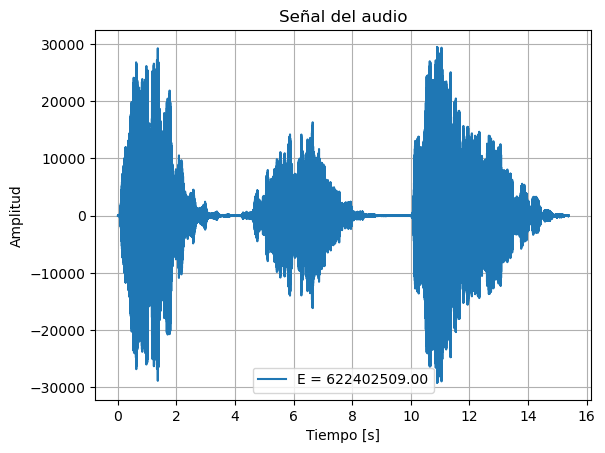

In [24]:
fs, data = wavfile.read("sonido.wav")

# Vector de tiempo
tt = np.arange(len(data)) / fs

# Energía
energia_sonido = np.sum(data**2)
print("Energía del sonido:", energia_sonido)

plt.figure()
plt.plot(tt, data, label = f"E = {energia_sonido:.2f}")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title("Señal del audio")
plt.legend()
plt.grid(True)
plt.show()


La energía fue calculada con la misma fórmula presentada en el punto 1. Para analizar esta señal, se utilizó la función **wavfile.read**, que devuelve tanto la frecuencia de muestreo como la información del audio en forma de vector. Al tratarse de un archivo *mono*, el vector de datos tiene una sola columna, lo que permitió trabajar directamente con él.

En intentos previos se había probado con un audio *estéreo*, el cual devuelve un arreglo con dos columnas (una por canal), lo que requiere convertirlo a una sola señal para poder operar, volviendo el proceso más engorroso. Por este motivo, se optó por utilizar directamente un audio *mono*.

A partir de la frecuencia de muestreo y la cantidad de muestras, se generó un nuevo vector de tiempo para la señal. Finalmente, el valor de energía obtenido resultó del orden de $10^8$, lo cual es coherente con la duración del audio y su contenido.

# Conclusion

Este trabajo práctico me demandó bastante tiempo, primero por la dificultad inicial para comprender las consignas y luego por el esfuerzo requerido en el desarrollo del código. Sin embargo, la variedad de ejercicios me permitió profundizar en los temas vistos en clase y, al mismo tiempo, mejorar mi manejo de Python para la generación y el análisis de señales.

A lo largo de los cinco puntos pude extraer conclusiones concretas en cada apartado, lo que me ayudó a reforzar los conceptos teóricos trabajados. Todavía me quedan algunas dudas respecto a la ortogonalidad y la correlación, pero considero que logré adquirir un entendimiento suficiente como para interpretar y analizar los resultados obtenidos.

En resumen, este informe fue una buena oportunidad para conectar teoría y práctica, y avanzar tanto en la comprensión matemática de las señales como en la capacidad de implementarlas y explorarlas mediante programación.

## Autoevaluacion

*Indicar una opción (marcada con negrita):*

Resolví la tarea con seguridad
**Resolví la tarea, pero tengo dudas** 
Resolví la tarea,pero no entendí bien
No pude resolverla y no entendí
Responder:

*¿Qué aprendiste al hacer esta tarea?*

En esta tarea pude aprender a generar distintos tipos de señales y analizar ortogonalidad y correlacion entre ellas. Pude ver como se comporta cada una de estas señales y que similitudes comparten. Aprendi a calcular potencia y energia. Tambien como graficar una señal de audio.

*¿Qué te quedó claro? ¿Qué te sigue costando?*

Todavia tengo algunas dudas con los conceptos de ortogonalidad y correlacion. En el caso de correlacion hice una analisis detallado de cada uno de los casos con ayuda de ChatGPT, pero no estoy segura si esta correcto.

*Indicar si se utilizó IA:*

**Sí, usé chatGPT, Qwen, Deepseek, Gemini, otra.**
No usé IA.
*En caso afirmativo, indicar una opción o varias:*

Escritura

**Código**

**Conceptos teorícos**

**Gráficos**

Conclusiones